# Семинар 5
## Методы оптимизации

На этом семинаре мы попрактикуемся в написании градиентных спусков и нахождении миниумов функций.

In [1]:
# Импортируем нужные библиотеки

import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

### Рассмотрим следующую функцию:

$$f(x,y) = 5x^2 + y^2 + 1$$

In [2]:
# Реализуем ее в коде

def f(xy):
    return 5 * xy[0] ** 2 + xy[1] ** 2 + 1

In [3]:
# Посмотрим правильно ли мы реализовали ее, посчитая ее значения в какой-нибудь точке
xy = [10, 20]
print(f"В точке x = {xy[0]}, y = {xy[1]}, функция принимает значение {f(xy)}")

В точке x = 10, y = 20, функция принимает значение 901


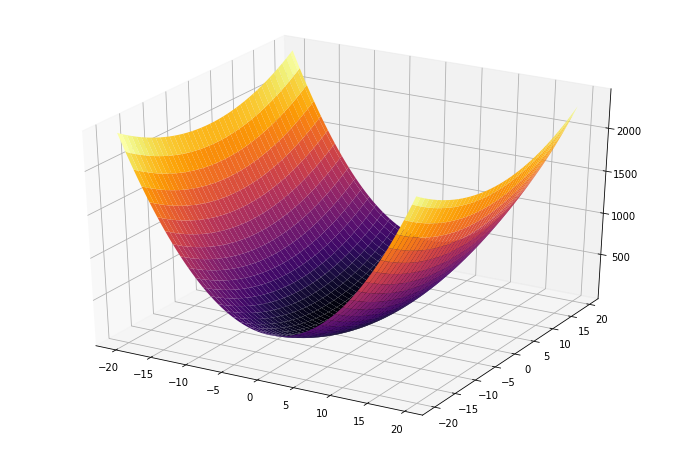

In [4]:
# Построим трехмерный график нашей функции

u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

### Найдем чему будет равен градиент нашей функции (назовем его g):

$$\overline g(x,y) = (10x, 2y)$$

In [5]:
# Реализуем подсчет градиента

def g(xy):
  return np.array([10 * xy[0], 2 * xy[1]])

In [6]:
# Посмотрим правильно ли мы реализовали ее, посчитая ее значения в какой-нибудь точке
xy = [10, 20]
print(f"В точке x = {xy[0]}, y = {xy[1]}, градиент функции принимает значение {g(xy)}")

В точке x = 10, y = 20, градиент функции принимает значение [100  40]


В какой точке эта функция имеет минимум?

### Найдем минимум нашей функции

Для нахождения минимума воспользуемся градиентным спуском.

Вспомним как формульно он выглядит:

$$w^{n+1} = w^{n} - \alpha \frac{∇f(w^n)}{\|∇f(w^n)\|}$$

In [7]:
# Реализуем функцию, которая принимат начальное положение и функцию вычисления градиента и находит минимум при помощи градиентного спуска

def grad_descent(w0, func_grad, alpha=0.01, tolerance=0.0001, n_iter=150):
    """
    args:
        - w0        - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
        - func_grad - градиент функции (питоновская функция, которая принимает на вход координаты и по ним считает градиент)
        - alpha     - leraning rate (шаг обучения)
        - tolerance - критерий остановки (если изменение весов меньше чем это значение)
        - n_iter    - количество итераций в градиентном спуске
    """

    w = np.array(w0)
    history = [w]

    for iter_number in tqdm(range(n_iter)):
        # Вычисляем градиент в текущей точке
        grad = func_grad(w)

        # Итерация градиентного спуска
        w = w - alpha * (grad / np.linalg.norm(grad))

        # Сохраняем новые аргументы в историяю
        history.append(w)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.max(np.abs(w - history[-2])) < tolerance:
            break

    return np.array(history)

In [8]:
# Запустим реализованную нами функцию с разными начальными точками (например [18, 7]) 
w0 = np.array([18, -7])
history = grad_descent(w0, g, alpha=0.2)

  0%|          | 0/150 [00:00<?, ?it/s]

In [9]:
# Посмотрим чему равен history
history[-1]

array([8.41013589e-02, 1.96734830e-10])

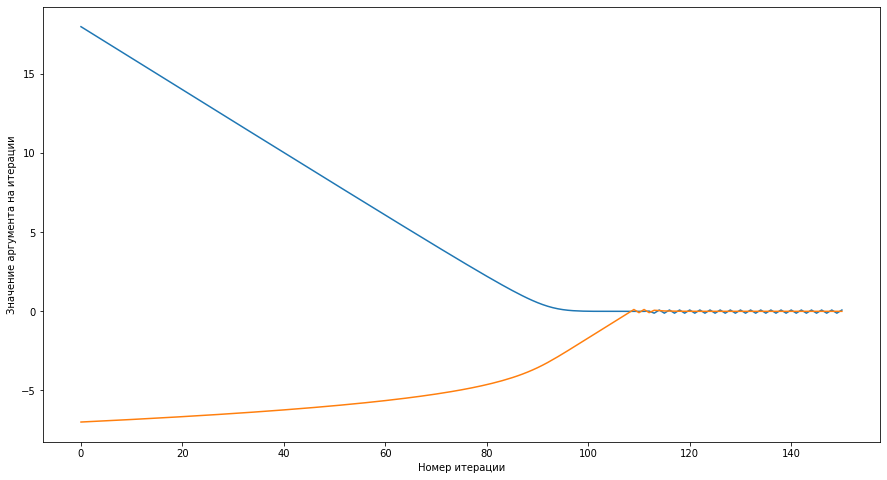

In [10]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

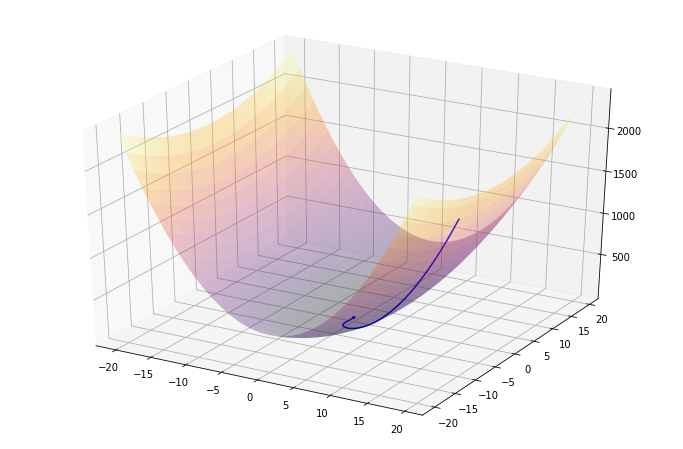

In [11]:
# Отрисуем путь, который прошел наш алгоритм прежде чем сойтись в минимум
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

# Отрисовываем функцию
ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)
# Точно также отрисовываем путь передав значения в нулевой колонке, первой колонке hist и значения функции f в этих точках
ax.plot(history[:, 0], history[:, 1], f([history[:, 0], history[:, 1]]), color='blue')

fig.show()

### Теперь рассмотрим следующую функцию:

$$f(x, y) = (x - y)^2$$

Ничего не напоминает?

Верно -- это частный случай MSE ($n=1$):
$$f(\overline{x}, \overline{y}) = \sum_i(x_i - y_i)^2$$

**NOTE:** Поскольку сейчас мы не говорим об алгоритмах машинного обучения, мы не будем находить минимум этой функции при каких-то параметрах! Наша задача сейчас куда проще -- мы хотим найти минимум этой фунции

In [12]:
# Реализуем ее в коде

def f(xy):
    return (xy[0] - xy[1]) ** 2

In [13]:
# Посмотрим правильно ли мы реализовали ее, посчитая ее значения в какой-нибудь точке
xy = [4, -2]
print(f"В точке x = {xy[0]}, y = {xy[1]}, функция принимает значение {f(xy)}")

В точке x = 4, y = -2, функция принимает значение 36


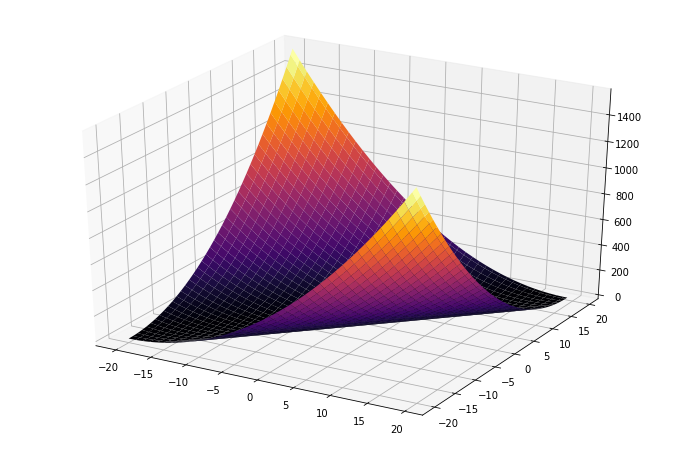

In [14]:
# Построим трехмерный график нашей функции

u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

Чем принципиально эта функция отличается от предыдущей?

### Найдем чему будет равен градиент нашей функции (назовем его g):

$$\overline g(x,y) = (2(x - y), -2(x - y))$$

In [15]:
# Реализуем подсчет градиента

def g(xy):
  return np.array([2 * (xy[0] - xy[1]), 2 * (xy[1] - xy[0])])

In [16]:
# Посмотрим правильно ли мы реализовали ее, посчитая ее значения в какой-нибудь точке

print(f"В точке x = {...}, y = {...}, градиент функции принимает значение {...}")

В точке x = Ellipsis, y = Ellipsis, градиент функции принимает значение Ellipsis


### Найдем минимум нашей функции

Для нахождения минимума воспользуемся модификацией градиентного спуска -- `momentum`.

Вспомним как формульно он выглядит:

$$g^{n} = \beta g^{n - 1} + (1 - \beta) \frac{∇f(w^{n-1})}{\|∇f(w^{n-1})\|}$$  

$$w^{n+1} = w^{n} - \alpha \frac{g^n}{\|g^n\|}$$

**NOTE:** $g^0$ принимают равным 0, потому что до начала движения у нас еще нет инерции. 

In [17]:
# Реализуем функцию, которая принимат начальное положение и функцию вычисления градиента и находит минимум при помощи метода momentum

def momentum(w0, func_grad, beta=0.01, alpha=0.01, tolerance=0.0001, n_iter=150):
    """
    args:
        - w0        - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
        - func_grad - градиент функции (питоновская функция, которая принимает на вход координаты и по ним считает градиент)
        - beta      - какое влияние будет оказывать момент (чем выше значение, тем меньше влияние)
        - alpha     - leraning rate (шаг обучения)
        - tolerance - критерий остановки (если изменение весов меньше чем это значение)
        - n_iter    - количество итераций в градиентном спуске
    """

    w = np.array(w0)
    history = [w]

    g = 0

    for iter_number in tqdm(range(n_iter)):
        # Вычисляем градиент в текущей точке
        grad = func_grad(w)

        # Считаем вспомогательную функцию g
        g = beta * g + (1 - beta) * (grad / np.linalg.norm(grad))

        # Итерация градиентного спуска
        w = w - alpha * (g / np.linalg.norm(g)) 

        # Сохраняем новые аргументы в историяю
        history.append(w)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.max(w - history[-2]) < tolerance:
            break

    return np.array(history)

In [18]:
# Запустим реализованную нами функцию с разными начальными точками (например [18, 7], [10, 20], [-15, 15]) 

history_1 = momentum([18.0, 7.0], g, n_iter=1500)
history_2 = momentum([10.0, 20.0], g, n_iter=1500)
history_3 = momentum([-15.0, 15.0], g, n_iter=15000)

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

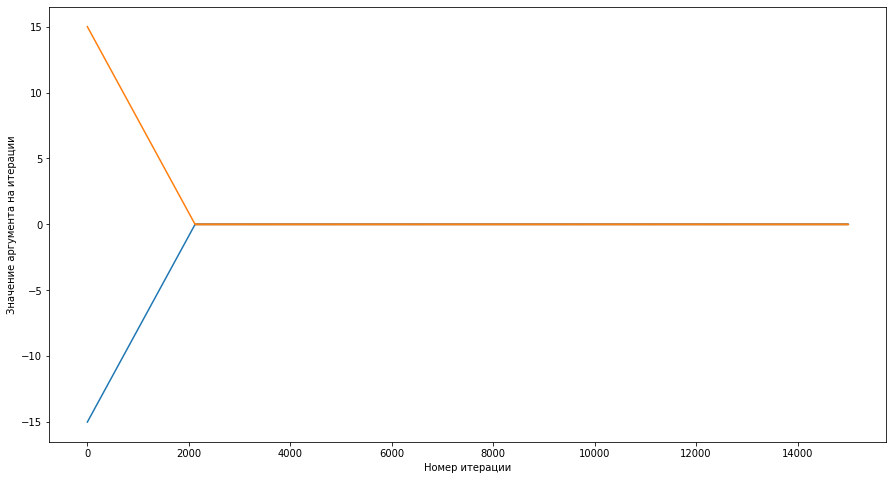

In [19]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history_3)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

Какие отличия от сходимости в градиентном спуске?

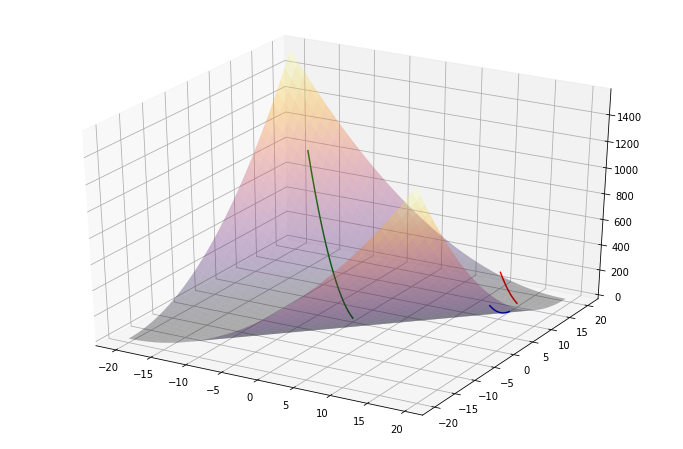

In [20]:
# Отрисуем путь, который прошел наш алгоритм прежде чем сойтись в минимум
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

# Отрисовываем функцию
ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

# Точно также отрисовываем путь передав значения в нулевой колонке, первой колонке hist и значения функции f в этих точках
# Сделаем это для всех запусков
ax.plot(history_1[:, 0], history_1[:, 1], f([history_1[:, 0], history_1[:, 1]]), color='blue')
ax.plot(history_2[:, 0], history_2[:, 1], f([history_2[:, 0], history_2[:, 1]]), color='red')
ax.plot(history_3[:, 0], history_3[:, 1], f([history_3[:, 0], history_3[:, 1]]), color='green')

fig.show()

Почему у нас ни разу не выполнилось условие остановки? Как бы мы могли модифицировать алгоритмы, чтобы алгоритмы сходились быстрее?

**Подсказка:** Подумайте, обязательно ли learning rate должен быть постоянным?

Можем внести наши модификации и посмотреть на то, сколько теперь итераций нужно алгоритму!